<a href="https://colab.research.google.com/github/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/blob/main/Lab1_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---



**Aim: This experiment loads the assigned CKD dataset, explores its structure using head(), dtypes, info(), and describe(), and visualizes relationships between features using histograms, pairplots, scatter plots, and correlation analysis. Tools used: Python, Pandas, NumPy, Matplotlib, Seaborn**

Section: J2
Name: Tanishq Choudhary
Reg No: 23FE10CSE00664

Import packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
%matplotlib inline

Parse the dataset. I am parsing from github to ensure globally available

In [ ]:
url = "https://raw.githubusercontent.com/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/main/data/chronic_kidney_disease_full.csv"
df = pd.read_csv(url)

Using .head() Shows the first 5 rows of the DataFrame by default.

In [ ]:
df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Using .dtypes which displays the data type of each column.

In [ ]:
df.dtypes

,0
'age',float64
'bp',float64
'sg',float64
'al',float64
'su',float64
'rbc',object
'pc',object
'pcc',object
'ba',object
'bgr',float64


Using .info gives a complete structural summary of the DataFrame. verbose=True ensures all columns are displayed.

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   'age'    391 non-null    float64
 1   'bp'     388 non-null    float64
 2   'sg'     353 non-null    float64
 3   'al'     354 non-null    float64
 4   'su'     351 non-null    float64
 5   'rbc'    248 non-null    object 
 6   'pc'     335 non-null    object 
 7   'pcc'    396 non-null    object 
 8   'ba'     396 non-null    object 
 9   'bgr'    356 non-null    float64
 10  'bu'     381 non-null    float64
 11  'sc'     383 non-null    float64
 12  'sod'    313 non-null    float64
 13  'pot'    312 non-null    float64
 14  'hemo'   348 non-null    float64
 15  'pcv'    330 non-null    object 
 16  'wbcc'   295 non-null    object 
 17  'rbcc'   270 non-null    object 
 18  'htn'    398 non-null    object 
 19  'dm'     397 non-null    object 
 20  'cad'    398 non-null    object 
 21  'appet'  399 non

Used for 25% for first quartile

50% for median

70%, 90% for higher distribution spread

In [ ]:
df.describe(percentiles=[0.1,0.25, 0.50, 0.70, 0.90])

,'age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
10%,28.000000,60.000000,1.010000,0.000000,0.000000,86.500000,19.000000,0.600000,131.000000,3.500000,8.600000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
70%,62.000000,80.000000,1.020000,2.000000,0.000000,142.000000,54.000000,2.400000,141.000000,4.800000,14.490000
90%,71.000000,90.000000,1.025000,3.000000,2.000000,254.000000,118.000000,6.780000,146.000000,5.200000,16.200000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Running without any values in braces.

In [ ]:
df.describe(percentiles=[])

,'age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Returns the list of column names in the DataFrame.

In [ ]:
df.columns

Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip("'").str.strip()

Plotting & Visualization

Pairplot gives grid of plots that show pairwise relationships between all numerical columns in your dataset.

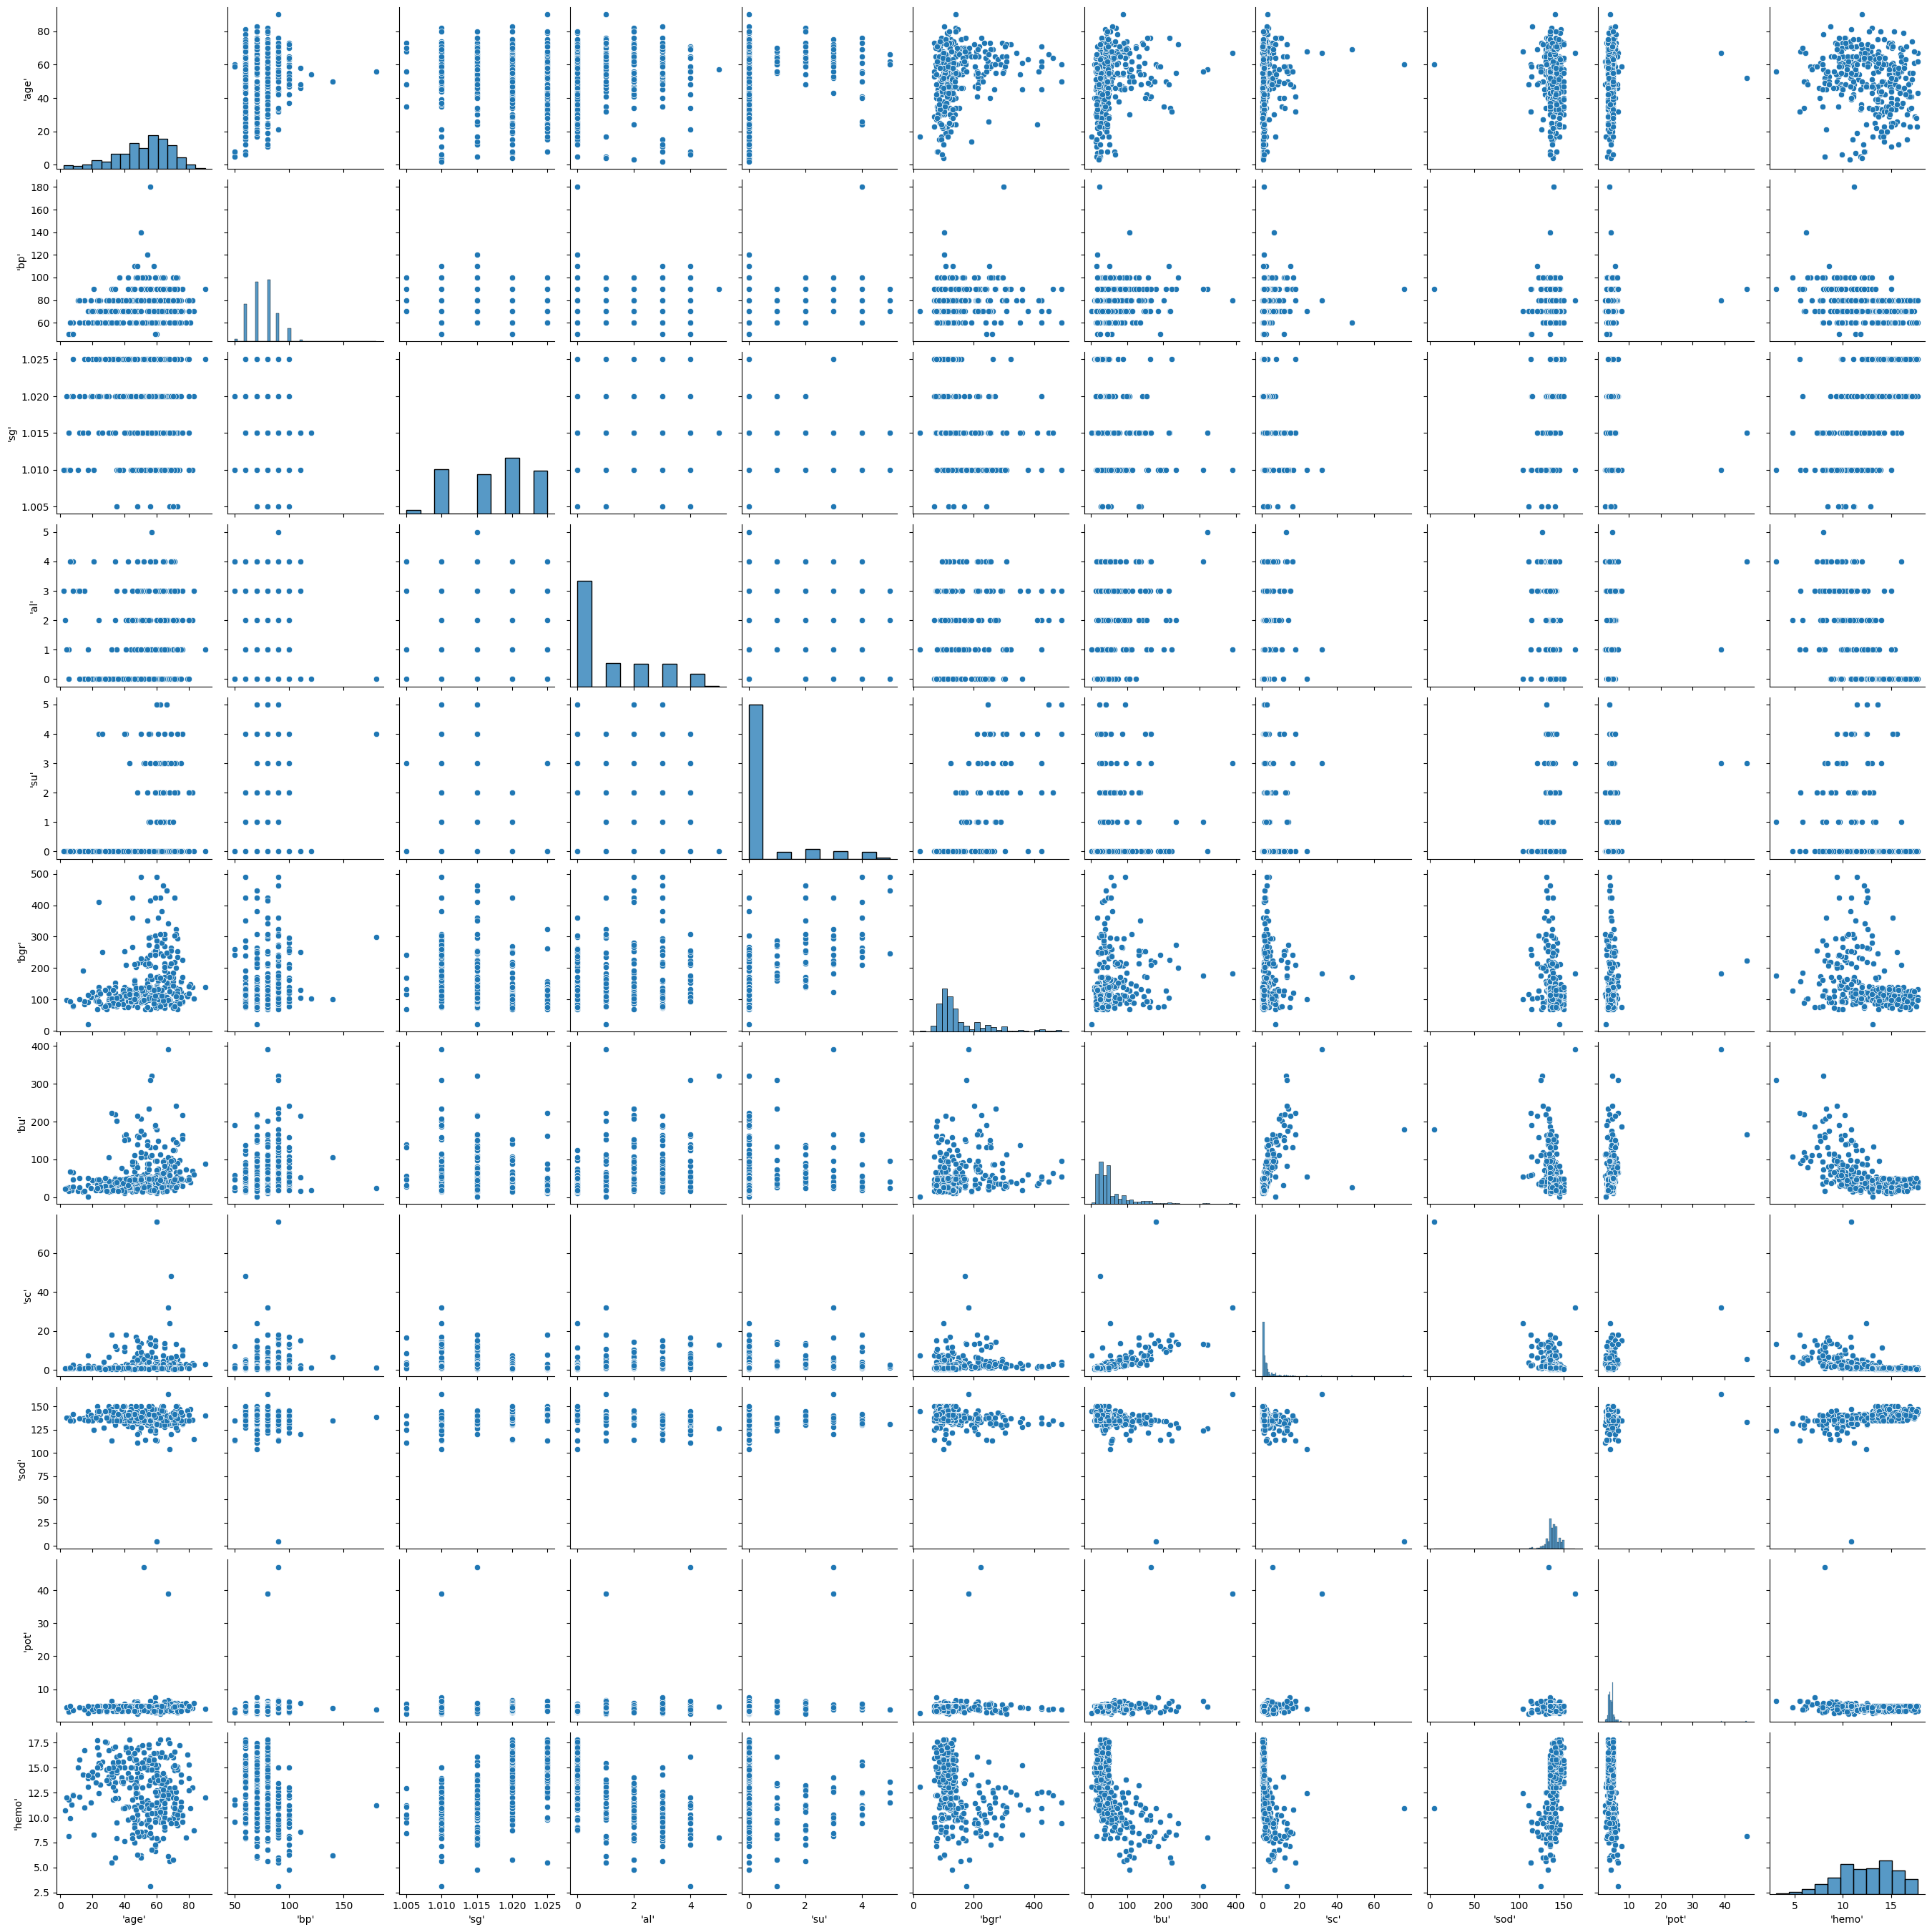

In [ ]:
sns.pairplot(df)

Distribution of price.

<Axes: ylabel='Frequency'>

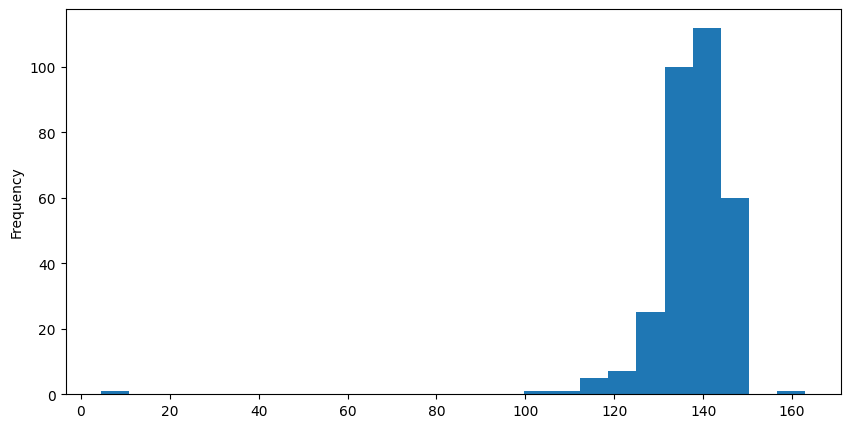

In [ ]:
df['sod'].plot.hist(bins=25, figsize=(10,5))

Using numeric only in corr to avoid problems with fields like address

In [ ]:
df.corr(numeric_only=True)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


<Axes: ylabel='Density'>

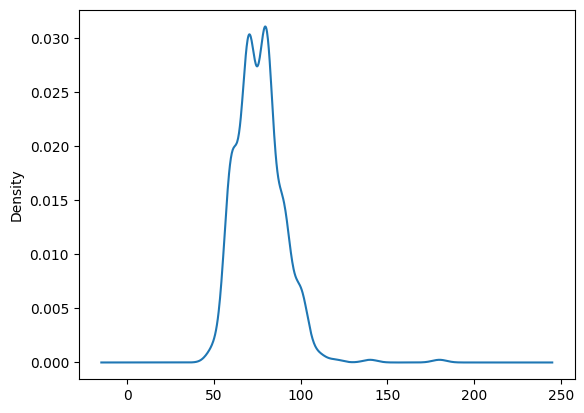

In [ ]:
df['bp'].plot.density()

Class Task: Run heatmap without values. Result: Does not work must give data.

In [ ]:
sns.heatmap()

TypeError: heatmap() missing 1 required positional argument: 'data'

Class task: Sod and bp correlation.

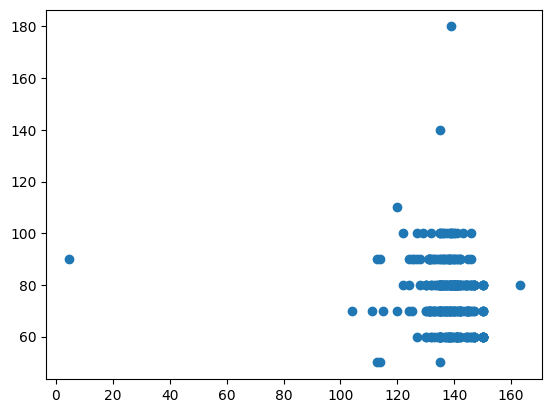

In [ ]:
#Class task:
plt.scatter(df['sod'], df['bp'])

**Conclusion: This experiment loads the assigned dataset using Pandas, explores its structure using head(), dtypes, info(), and describe(), and visualizes relationships between features using histograms, pairplots, scatter plots, and correlation analysis. Tools used: Python, Pandas, NumPy, Matplotlib, Seaborn**